In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test/1679927574-1926.jpg')
img.shape

(900, 1200, 3)

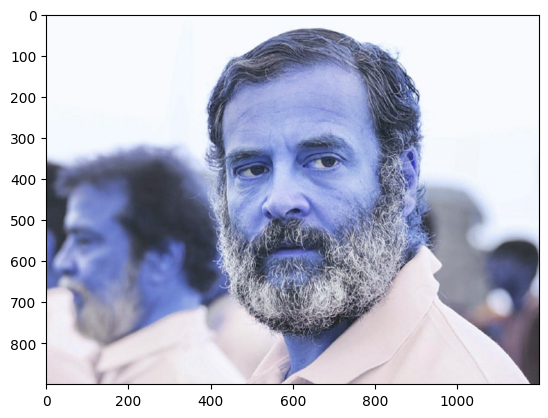

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(900, 1200)

In [5]:
gray

array([[251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       ...,
       [216, 216, 216, ...,  66,  66,  66],
       [216, 216, 216, ...,  66,  66,  66],
       [216, 216, 216, ...,  66,  66,  66]], dtype=uint8)

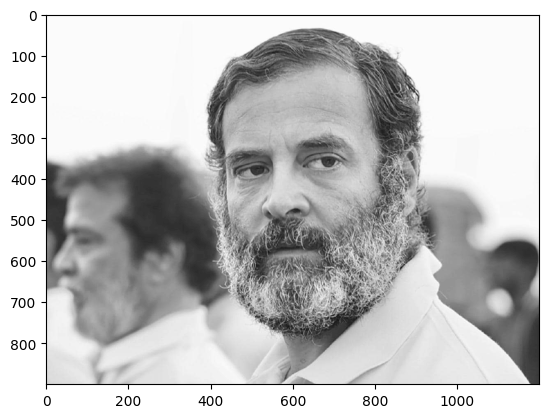

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[338, 174, 499, 499]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(338, 174, 499, 499)

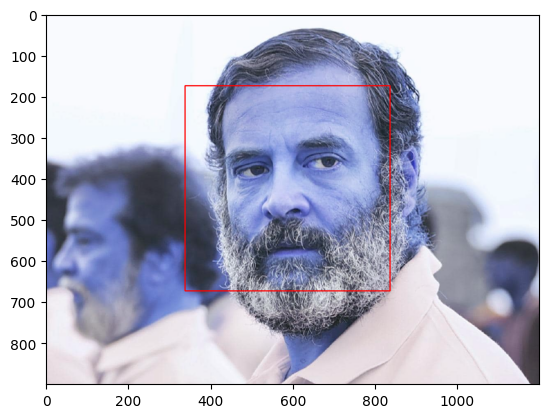

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

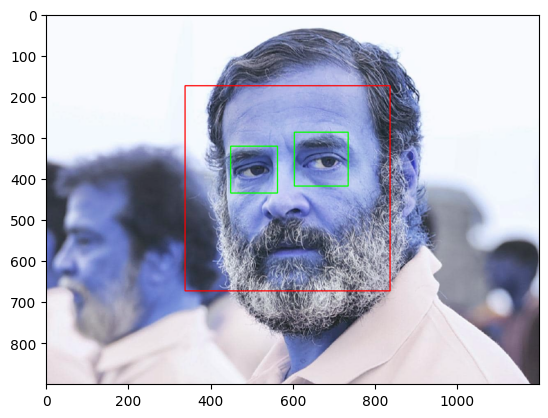

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

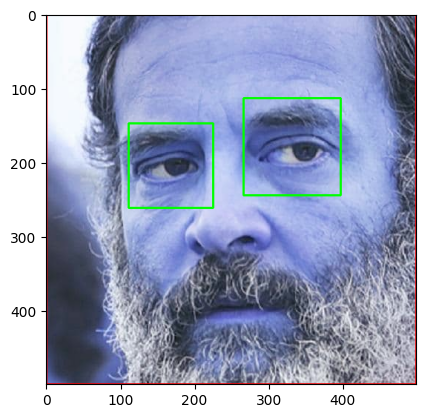

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(499, 499, 3)

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if(img is not None):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color

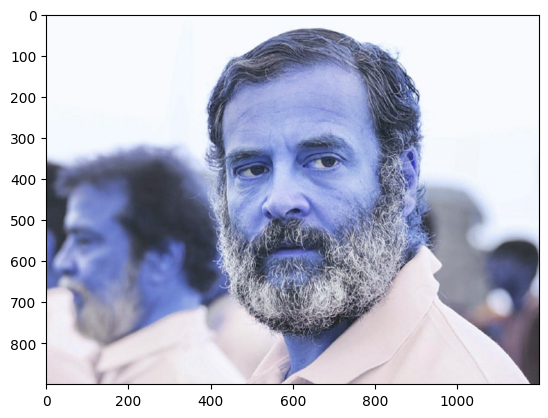

In [14]:
original_image = cv2.imread('./test/1679927574-1926.jpg')
plt.imshow(original_image)

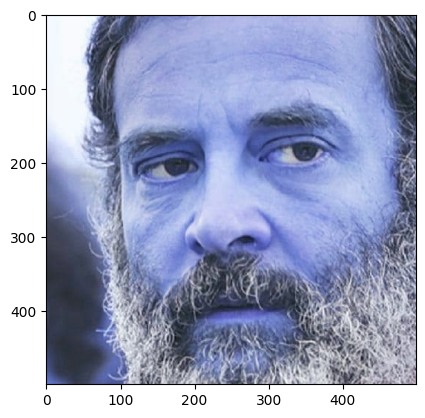

In [15]:
cropped_image = get_cropped_image_if_2_eyes('./test/1679927574-1926.jpg')
plt.imshow(cropped_image)

In [16]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [17]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs

['./dataset/arvind kejriwal',
 './dataset/cropped',
 './dataset/narendra modi',
 './dataset/naveen patnaik',
 './dataset/nitish kumar',
 './dataset/rahul gandhi',
 './dataset/yogi adityanath']

In [19]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [20]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/arvind kejriwal
Generating cropped images in folder:  ./dataset/cropped/narendra modi
Generating cropped images in folder:  ./dataset/cropped/naveen patnaik
Generating cropped images in folder:  ./dataset/cropped/nitish kumar
Generating cropped images in folder:  ./dataset/cropped/rahul gandhi
Generating cropped images in folder:  ./dataset/cropped/yogi adityanath


In [80]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )

    imArray =  np.float32(imArray)   
    imArray /= 255;
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

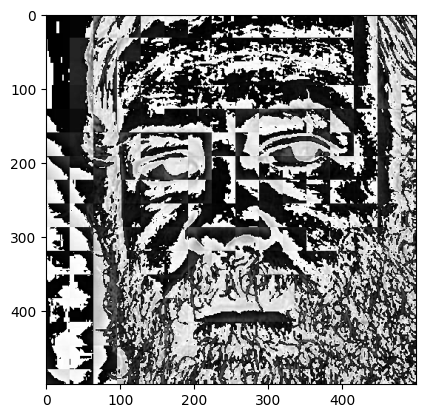

In [81]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [82]:
celebrity_file_names_dict

{'arvind kejriwal': ['./dataset/cropped/arvind kejriwal/arvind kejriwal1.png',
  './dataset/cropped/arvind kejriwal/arvind kejriwal2.png',
  './dataset/cropped/arvind kejriwal/arvind kejriwal3.png',
  './dataset/cropped/arvind kejriwal/arvind kejriwal4.png',
  './dataset/cropped/arvind kejriwal/arvind kejriwal5.png',
  './dataset/cropped/arvind kejriwal/arvind kejriwal6.png',
  './dataset/cropped/arvind kejriwal/arvind kejriwal7.png',
  './dataset/cropped/arvind kejriwal/arvind kejriwal8.png',
  './dataset/cropped/arvind kejriwal/arvind kejriwal9.png',
  './dataset/cropped/arvind kejriwal/arvind kejriwal10.png',
  './dataset/cropped/arvind kejriwal/arvind kejriwal11.png',
  './dataset/cropped/arvind kejriwal/arvind kejriwal12.png',
  './dataset/cropped/arvind kejriwal/arvind kejriwal13.png',
  './dataset/cropped/arvind kejriwal/arvind kejriwal14.png',
  './dataset/cropped/arvind kejriwal/arvind kejriwal15.png',
  './dataset/cropped/arvind kejriwal/arvind kejriwal16.png',
  './dataset/c

In [83]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'arvind kejriwal': 0,
 'cropped': 1,
 'narendra modi': 2,
 'naveen patnaik': 3,
 'nitish kumar': 4,
 'rahul gandhi': 5,
 'yogi adityanath': 6}

In [84]:
X=[]
y=[]
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(celebrity_name)

In [85]:
len(X[0])

4096

In [86]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(298, 4096)

In [87]:
X[0]

array([102., 183., 250., ..., 192., 255.,  26.])

Data cleaning:
1. cropping the image by detecting face and eyes
2. changing all the images into PyWavelets

In [88]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state = 0)
pipe=Pipeline([('scalar',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.88

In [90]:
print(classification_report(y_test,pipe.predict(X_test)))

                 precision    recall  f1-score   support

arvind kejriwal       0.92      0.92      0.92        13
  narendra modi       1.00      0.89      0.94         9
 naveen patnaik       0.70      0.88      0.78         8
   nitish kumar       1.00      0.94      0.97        16
   rahul gandhi       0.89      0.84      0.86        19
yogi adityanath       0.73      0.80      0.76        10

       accuracy                           0.88        75
      macro avg       0.87      0.88      0.87        75
   weighted avg       0.89      0.88      0.88        75



In [54]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [94]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [95]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.842727,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.537778,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.852020,{'logisticregression__C': 1}


In [96]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [98]:
best_estimators['svm'].score(X_test,y_test)

0.9333333333333333

In [99]:
best_estimators['random_forest'].score(X_test,y_test)

0.5866666666666667

In [100]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9466666666666667

In [101]:
best_clf=best_estimators['logistic_regression']

In [104]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[12,  0,  0,  0,  0,  1],
       [ 0,  8,  0,  0,  1,  0],
       [ 0,  0,  6,  2,  0,  0],
       [ 0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0, 19,  0],
       [ 0,  0,  0,  0,  0, 10]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

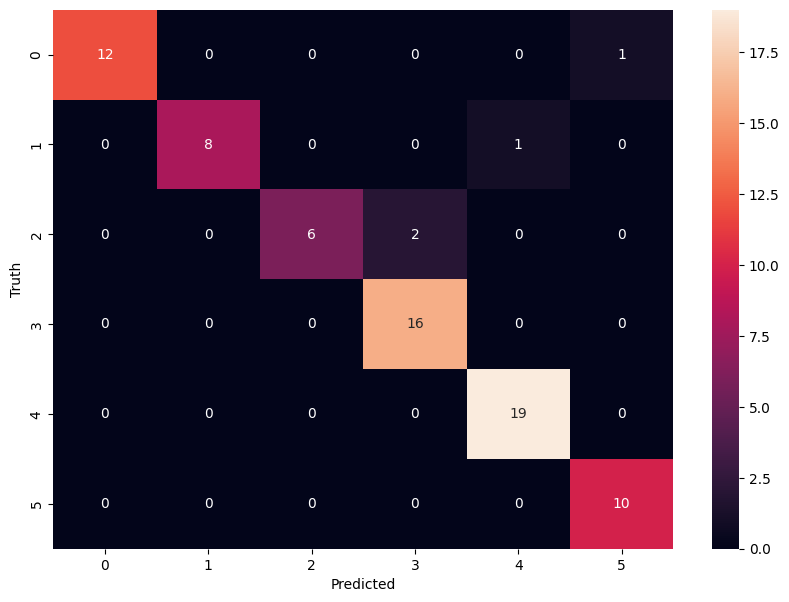

In [105]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [106]:
class_dict

{'arvind kejriwal': 0,
 'cropped': 1,
 'narendra modi': 2,
 'naveen patnaik': 3,
 'nitish kumar': 4,
 'rahul gandhi': 5,
 'yogi adityanath': 6}

In [111]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [112]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))